In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.io import arff
import data_processing as dp
from sklearn.linear_model import LogisticRegression
import warnings
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

warnings.filterwarnings("ignore")

data = arff.loadarff("../data/3year.arff")
df = pd.DataFrame(data[0])
df_origin = df.copy()

In [8]:
def logistic_regression_model(*args):
    X_train = args[0]
    X_test = args[1]
    y_train = args[2]
    y_test = args[3]

    # Reset indices to ensure alignment
    X_train.reset_index(drop=True, inplace=True)
    y_train.reset_index(drop=True, inplace=True)

    logistic_model = LogisticRegression()

    logistic_model.fit(X_train, y_train)

    train_predictions = logistic_model.predict(X_train)
    test_predictions = logistic_model.predict(X_test)

    train_accuracy = accuracy_score(y_train, train_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)

    # print("Training Accuracy:", train_accuracy)
    # print("Test Accuracy:", test_accuracy)

    return train_accuracy, test_accuracy

In [9]:
train_test_dataset = dp.pre_process(df)  # with SMOTE
print(f"X_train.shape: {train_test_dataset[0].shape}")

X_train.shape: (13978, 30)


Best k for train_accuracy: 25
Best k for test_accuracy: 15


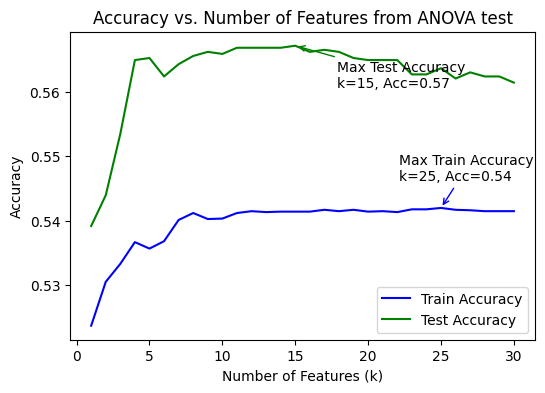

In [12]:
dp.find_best_k_features_from_ANOVA(logistic_regression_model, *train_test_dataset)

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1


def get_errors(model, *args):
    X_train = args[0]
    X_test = args[1]
    y_train = args[2]
    y_test = args[3]

    # Predictions on training data
    y_train_pred = model.predict(X_train)
    # Predictions on test data
    y_test_pred = model.predict(X_test)

    # Calculate metrics for training data
    train_accuracy, train_precision, train_recall, train_f1 = calculate_metrics(
        y_train, y_train_pred
    )

    # Calculate metrics for test data
    test_accuracy, test_precision, test_recall, test_f1 = calculate_metrics(
        y_test, y_test_pred
    )

    # Print metrics
    print("Training Metrics:")
    print("Accuracy:", train_accuracy)
    print("Precision:", train_precision)
    print("Recall:", train_recall)
    print("F1-score:", train_f1)
    print()
    print("Test Metrics:")
    print("Accuracy:", test_accuracy)
    print("Precision:", test_precision)
    print("Recall:", test_recall)
    print("F1-score:", test_f1)


# Assuming logistic_trained_model, X_train, X_test, y_train, y_test are defined
get_errors(logistic_regression_model, *train_test_dataset)

AttributeError: 'function' object has no attribute 'predict'